# ***Data Collection***
* Data Collection is an essential part of exploratory data analysis. It refers to
the process of finding and loading data into our system. Good, reliable data can be found on various public sites or bought from private organizations. Some reliable sites for data collection are Kaggle, Github, Machine Learning Repository, etc.

* The data depicted below represents life expectancy dataset that is available on Kaggle. It contains 183 country information and many factors that could affect the life expectancy.




In [16]:
import numpy as np
import plotly.express as px
import pandas as pd

In [17]:
df = pd.read_csv('life_expectancy.csv')

In [18]:
df.sample(frac = 0.01)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
899,Fiji,2014,Developing,69.7,19.0,0,0.01,50.539484,99.0,0,...,99.0,4.49,99.0,0.1,546.372800,88586.0,4.0,3.7,0.727,15.2
1307,Jamaica,2006,Developing,74.0,15.0,1,3.63,194.092569,97.0,0,...,99.0,4.22,95.0,1.5,4313.168200,276279.0,1.9,1.7,0.709,12.5
2762,United Kingdom of Great Britain and Northern I...,2015,Developed,81.2,69.0,3,10.66,0.000000,NaN,91,...,96.0,NaN,96.0,0.1,NaN,NaN,0.8,0.6,NaN,NaN
801,Ecuador,2000,Developing,72.8,163.0,9,3.99,84.175270,36.0,0,...,83.0,3.38,87.0,0.3,1451.297760,12628596.0,1.6,1.5,0.668,12.4
2094,Republic of Korea,2008,Developing,83.0,75.0,2,9.31,0.000000,94.0,2,...,92.0,6.16,94.0,0.1,NaN,NaN,1.5,1.0,NaN,NaN
2704,Turkmenistan,2008,Developing,64.5,235.0,6,2.40,34.239794,96.0,0,...,96.0,1.93,96.0,0.1,394.467675,4935762.0,3.2,3.3,0.000,10.5
124,Australia,2003,Developed,83.0,71.0,1,9.97,3829.550928,95.0,91,...,92.0,8.32,93.0,0.1,23465.385590,198954.0,0.7,0.7,0.905,20.6
2805,United States of America,2004,Developed,77.5,111.0,28,8.48,0.000000,92.0,37,...,92.0,15.14,96.0,0.1,NaN,NaN,0.7,0.6,NaN,NaN
1406,Kuwait,2003,Developing,73.4,93.0,0,0.03,159.009873,99.0,0,...,99.0,3.23,99.0,0.1,2271.569610,NaN,3.2,3.0,0.788,14.1
2665,Tunisia,2015,Developing,75.3,1.0,3,NaN,0.000000,98.0,16,...,98.0,NaN,98.0,0.1,3828.915890,11273661.0,6.5,6.4,0.723,14.6


# **Data Cleaning**
Data cleaning refers to the process of removing unwanted variables and values from your dataset and getting rid of any irregularities in it. Such anomalies can disproportionately skew the data and hence adversely affect the results. Some steps that can be done to clean data are:





* Removing missing values, outliers, and unnecessary rows/ columns.
* Re-indexing and reformatting our data.

In [19]:
#check to see the number of missing values in each column
df.isna().sum()


Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [20]:
# Reinformation
df = pd.DataFrame(df)

# Assuming df_main should be a copy of df before interpolation (if needed)
df_main = df.copy()

# Interpolating specific columns
filled_col = df[['Life expectancy ', 'Adult Mortality', 'Alcohol', 'Hepatitis B']].interpolate()

# Correctly assigning interpolated columns back to df_main
df_main['Life expectancy '] = filled_col['Life expectancy ']
df_main['Adult Mortality'] = filled_col['Adult Mortality']
df_main['Alcohol'] = filled_col['Alcohol']
df_main['Hepatitis B'] = filled_col['Hepatitis B']

print(df_main)

          Country  Year      Status  Life expectancy   Adult Mortality  \
0     Afghanistan  2015  Developing              65.0            263.0   
1     Afghanistan  2014  Developing              59.9            271.0   
2     Afghanistan  2013  Developing              59.9            268.0   
3     Afghanistan  2012  Developing              59.5            272.0   
4     Afghanistan  2011  Developing              59.2            275.0   
...           ...   ...         ...               ...              ...   
2933     Zimbabwe  2004  Developing              44.3            723.0   
2934     Zimbabwe  2003  Developing              44.5            715.0   
2935     Zimbabwe  2002  Developing              44.8             73.0   
2936     Zimbabwe  2001  Developing              45.3            686.0   
2937     Zimbabwe  2000  Developing              46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0                62     0.01    

# **Univariate Analysis**
In Univariate Analysis, we analyze data of just one variable. A variable in your dataset refers to a single feature/ column. It can be done either with graphical or non-graphical means by finding specific mathematical values in the data. Some visual methods include:

* Histograms: Bar plots in which the frequency of data is represented with rectangle bars.
* Box-plots: Here the information is represented in the form of boxes.

In [21]:
freq_table = pd.pivot_table(df_main, index='Year', columns= 'Status', aggfunc='size')
print(freq_table)

Status  Developed  Developing
Year                         
2000           32         151
2001           32         151
2002           32         151
2003           32         151
2004           32         151
2005           32         151
2006           32         151
2007           32         151
2008           32         151
2009           32         151
2010           32         151
2011           32         151
2012           32         151
2013           32         161
2014           32         151
2015           32         151


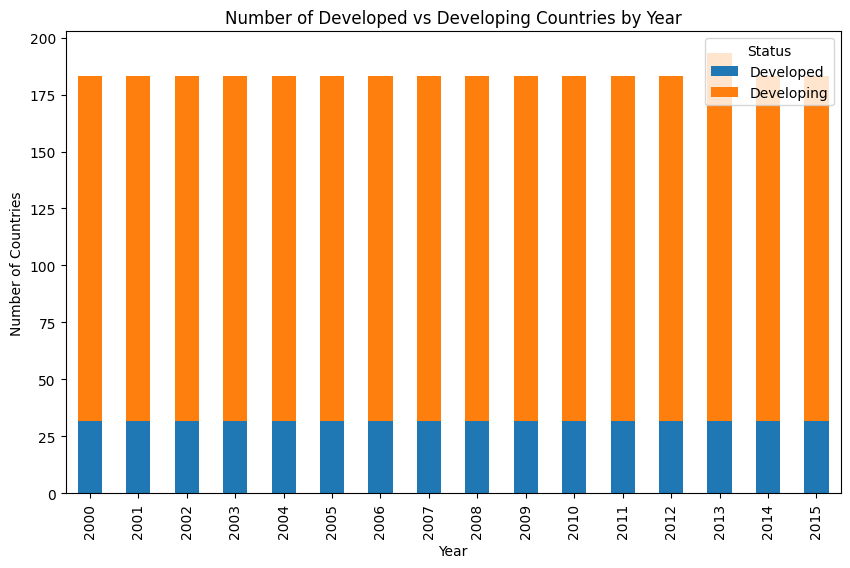

In [22]:
import matplotlib.pyplot as plt

# Plotting
freq_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Number of Developed vs Developing Countries by Year')
plt.xlabel('Year')
plt.ylabel('Number of Countries')
plt.legend(title='Status')
plt.show()


Frequency Table:
Status
Developing    2426
Developed      512
Name: count, dtype: int64


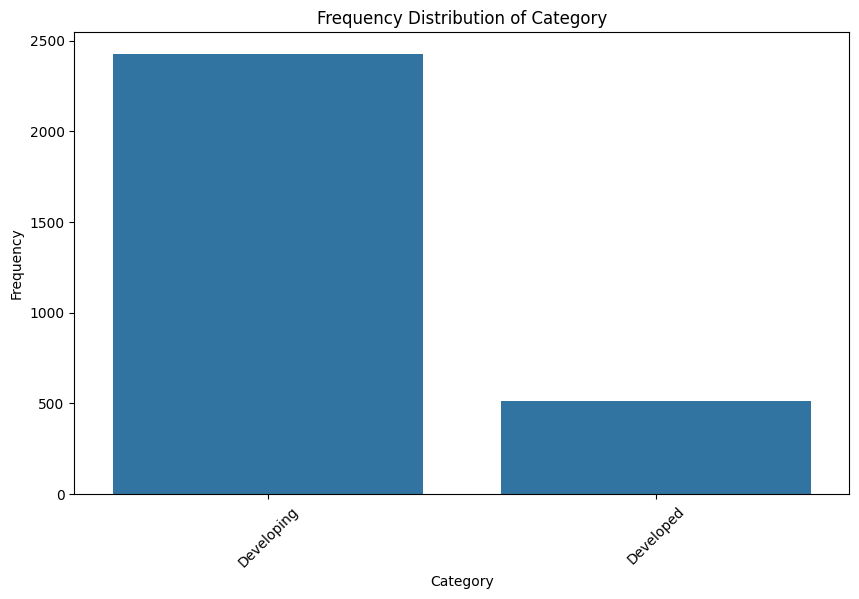

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
# Assuming df is your DataFrame and 'Category' is your categorical column
category_counts = df_main['Status'].value_counts()

# Print frequency table
print("Frequency Table:")
print(category_counts)

# Plotting bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Frequency Distribution of Category')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotating the labels if they overlap
plt.show()


In [24]:
df_main.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


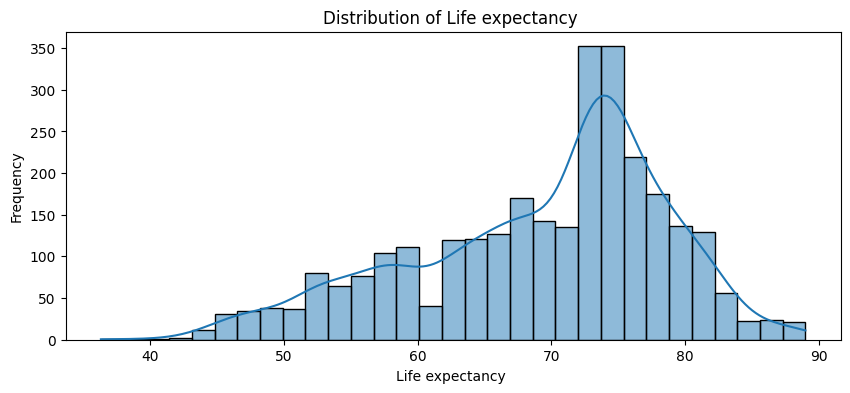

Sample does not normal distributed (reject H0)


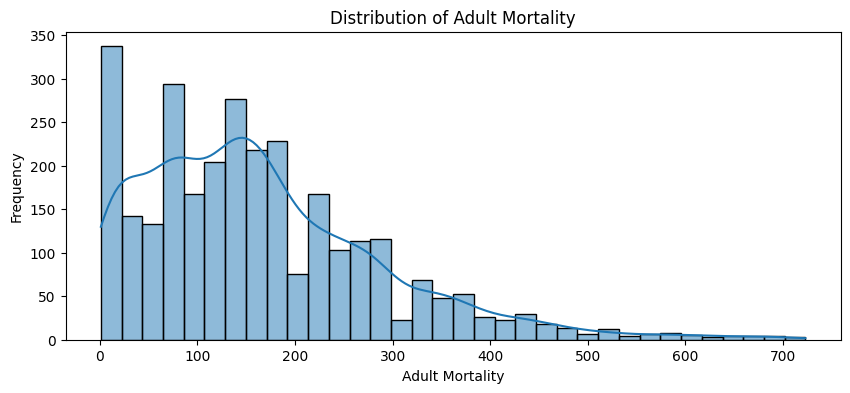

Sample does not normal distributed (reject H0)


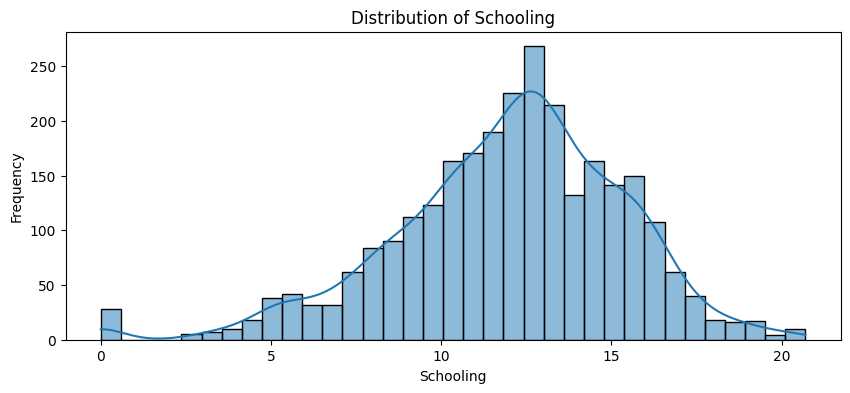

Sample looks normal distributed (fail to reject H0)


In [25]:
# Selecting quantitative variables
quantitative_vars = ['Life expectancy ', 'Adult Mortality', 'Schooling']

# Plot histograms and calculate summary statistics for each quantitative variable
for var in quantitative_vars:
    # Histogram
    plt.figure(figsize=(10, 4))
    sns.histplot(df_main[var], kde=True)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()
    #normality test
    stat, p = shapiro(df_main[var])
    alpha = 0.05
    if p > alpha:
      print('Sample looks normal distributed (fail to reject H0)')
    else:
      print('Sample does not normal distributed (reject H0)')


# **Bivariate Analysis**
 Using two variables and compare them. This way, we can find how one feature affects the other. It is done with scatter plots, which plot individual data points or correlation matrices that plot the correlation in hues. We can also use boxplots.
          

In [26]:
print(df_main.columns)

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness__1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')


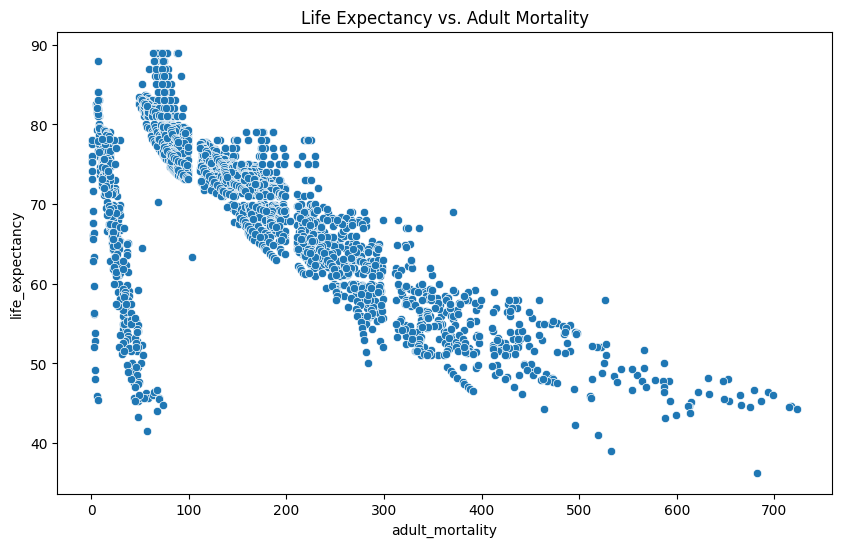

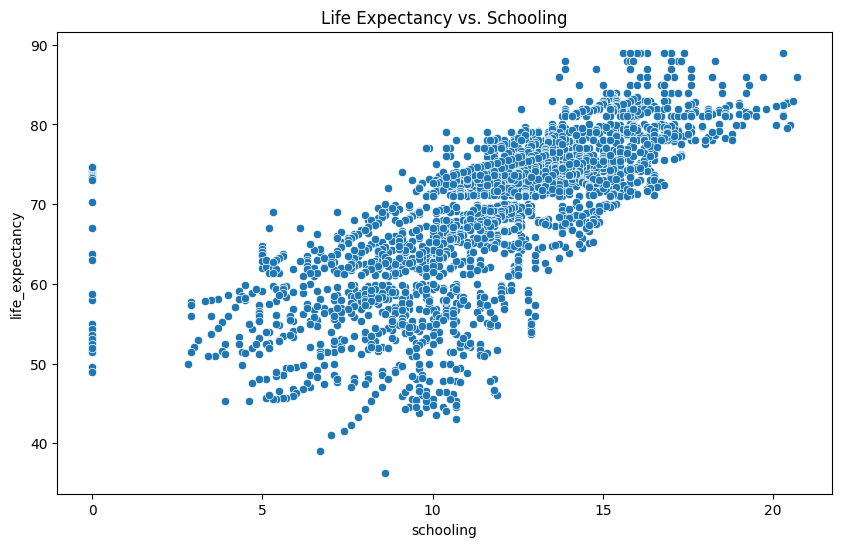

In [27]:
# Remove trailing spaces and standardize capitalization
df_main.columns = df_main.columns.str.strip().str.replace(' ', '_').str.lower()

# Check new column names
print(df_main.columns)

# After renaming, your plot code would look cleaner:
# Scatter plot of Adult Mortality vs. Life Expectancy
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_main, x='adult_mortality', y='life_expectancy')
plt.title('Life Expectancy vs. Adult Mortality')
plt.show()

# Scatter plot of Infant Deaths vs. Life Expectancy
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_main, x='schooling', y='life_expectancy')
plt.title('Life Expectancy vs. Schooling')
plt.show()


In [28]:
X1 = df_main['income_composition_of_resources']
X2 = df_main['schooling']
Y = df_main['life_expectancy']
d

NameError: name 'd' is not defined

$ r = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n}(x_i - \bar{x})^2}\sqrt{\sum_{i=1}^{n}(y_i - \bar{y})^2}} $

In [ ]:
def correlation_coefficient(X,Y):
    X_mean = np.mean(X)
    Y_mean = np.mean(Y)
    A = (X-X_mean)
    B = (Y-Y_mean)
    r = np.sum( A*B) / np.sqrt(np.sum(A**2)*np.sum(B**2))
    return r


In [ ]:
correlation_coefficient(X1,Y),correlation_coefficient(X2,Y)

# $ \hat{Y} = Intercept + Slope*X $
$Slope = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n}(x_i - \bar{x})^2}                   $ <br>
$Intercept = \bar{y} - Slope*\bar{x}$               <br>

In [ ]:
def linear_regression_line (X,Y):
    X_mean = np.mean(X)
    Y_mean = np.mean(Y)
    A = (X-X_mean)
    B = (Y-Y_mean)
    S = np.sum(A*B) / np.sum(A**2)
    I = Y_mean - S*X_mean
    print(f"linear regression line: Y = {round(I,3)} + {round(S,3)}*X")
    return I,S


In [ ]:
I1,S1 = linear_regression_line(X1,Y)
I2,S2 = linear_regression_line(X2,Y)

In [ ]:
Y_predict1 = I1 + S1*X1
Y_predict2 = I2 + S2*X2
residual1 = Y-Y_predict1
residual2 = Y-Y_predict2


In [ ]:
figs,(A,B) = plt.subplots(1,2,figsize = (10,6))
A.scatter(Y_predict1,residual1)
A.set_xlabel('Y predict')
A.set_ylabel('Residual')
A.set_title("Income composition of resources")
A.plot([0, 100], [0,0], 'r-')
B.scatter(Y_predict2,residual2)
B.set_xlabel('Y predict')
B.set_ylabel('Residual')
B.set_title("Schooling")
B.plot([0, 100], [0,0], 'r-')


plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Example data
hours_studied = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
exam_scores = [60, 65, 70, 75, 80, 85, 90, 95, 100, 105]

# Create a scatter plot
plt.scatter(hours_studied, exam_scores)
plt.xlabel('Hours Studied')
plt.ylabel('Exam Scores')
plt.title('Scatter Plot of Hours Studied vs. Exam Scores')
plt.show()

In [ ]:
plt.scatter(X1,Y)
plt.plot(X1,Y_predict1,'r')
plt.show

In [ ]:
plt.scatter(X2,Y)
plt.plot(X2,Y_predict2,'r')
plt.show